<a href="https://colab.research.google.com/github/maulitayasmin/PCVK_2024_18/blob/main/Week5_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Nama : Maulita Yasmin N
* Kelas : 3E
* Absen : 18
* NIM : 2241720010

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# TUGAS PRAKTIKUM

 Gamma Correction pada citra 
-------------------------------
Masukkan nilai Gamma: 3


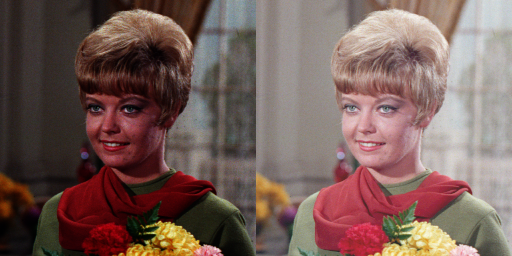

In [9]:
# 1. BUAT GAMMA CORRECTION

import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np


print(' Gamma Correction pada citra ')
print('-------------------------------')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

# Membaca gambar dari path yang sesuai
original_image = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')

# Membuat array kosong untuk menyimpan gambar hasil gamma correction
gamma_image = np.zeros(original_image.shape, original_image.dtype)

# Melakukan perulangan pixel-by-pixel pada gambar
for h in range(original_image.shape[0]): # baris (height)
  for w in range(original_image.shape[1]): # kolom (width)
    for c in range(original_image.shape[2]): # channel (BGR)

    # Menerapkan rumus gamma correction untuk setiap pixel
      gamma_image[h,w,c] = np.clip(255 * pow  (original_image[h,w,c] / 255, (1 / gamma)), 0, 255)

# Menggabungkan gambar asli dan hasil gamma correction secara horizontal
final_frame = cv.hconcat((original_image, gamma_image))

# Menampilkan gambar asli dan gambar hasil gamma correction
cv2_imshow(final_frame)

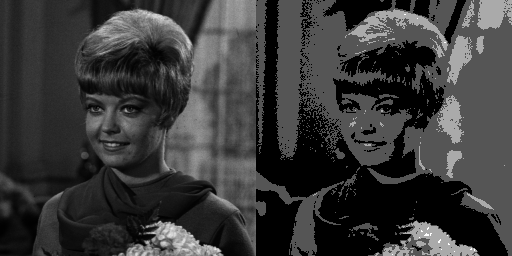

In [13]:
# 2. BUAT SIMULASI IMAGE DEPTH

# Mendefinisikan bit depth dan menghitung level kuantisasi
bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)

# Membaca gambar dalam mode grayscale
original_image = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original_image.shape, original_image.dtype)

# Kuantisasi gambar
for h in range(original_image.shape[0]): # baris
    for w in range(original_image.shape[1]): # kolom

        # Pemrosesan citra digital untuk melakukan kuantisasi gambar
        depth_image[h, w] = np.clip(round(original_image[h, w] / level) * level, 0, 255)

# Menggabungkan gambar asli dan gambar kuantisasi
final_frame = cv.hconcat((original_image, depth_image))

# Menampilkan gambar asli dan gambar kuantisasi
cv2_imshow(final_frame)

Nilai PSNR : 27.56691732 dB


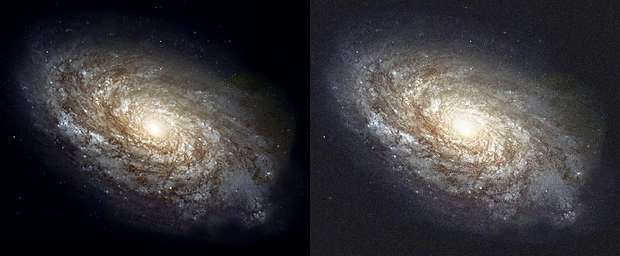

In [44]:
# 3 Average Denoising

import glob  # Digunakan untuk mencari file dengan pola tertentu
from math import log10, sqrt  # Digunakan untuk menghitung PSNR

# Membaca gambar asli (galaxy.jpg) yang akan dibandingkan dengan citra hasil denoising
img1 = cv.imread('/content/drive/MyDrive/PCVK/Images/galaxy.jpg')

# Menyiapkan list kosong untuk menyimpan gambar-gambar dengan noise
cv_img = []

# Mengambil semua gambar dengan noise dari folder /noises/ dengan ekstensi .jpg
for img in glob.glob('/content/drive/MyDrive/PCVK/Images/noises/*.jpg'):
    n = cv.imread(img)  # Membaca setiap gambar yang ditemukan
    cv_img.append(n)    # Menyimpan gambar yang telah dibaca ke dalam list cv_img

# Inisialisasi noise dengan gambar noise pertama sebagai dasar untuk proses averaging
noise = cv_img[0]

# Menentukan berapa banyak gambar noise yang akan di-average
noise_count = 4

# Mengiterasi gambar noise untuk melakukan penggabungan secara bertahap
for i in range(noise_count):
    if i == 0:
        pass  # Melewati iterasi pertama karena dst sudah diset sebagai gambar pertama
    else:
        alpha = 1.0 / (i + 1)  # Alpha adalah bobot dari gambar yang akan digabung
        beta = 1.0 - alpha     # Beta adalah bobot dari dst (gambar hasil penggabungan sebelumnya)
        # Menggabungkan dua gambar dengan bobot alpha dan beta secara bertahap
        noise = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

# Fungsi untuk menghitung PSNR (Peak Signal-to-Noise Ratio) antara dua gambar
def PSNR(img1, img2):
    # Menghitung Mean Squared Error (MSE) antara dua gambar
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:  # Jika MSE adalah 0, berarti tidak ada perbedaan antara dua gambar
      return 100  # PSNR tidak relevan karena tidak ada noise
    max_pixel = 255.0  # Nilai maksimum intensitas piksel (8-bit)
    psnr = 20 * log10(max_pixel / sqrt(mse))  # Rumus untuk menghitung PSNR
    return psnr

# Menghitung PSNR antara gambar asli (img1) dan gambar hasil denoising (dst)
img2 = noise
psnr = PSNR(img1, img2)

# Menampilkan nilai PSNR dalam desibel (dB)
print(f'Nilai PSNR : {psnr:.8f} dB')

# Menggabungkan gambar asli dan hasil denoising secara horizontal untuk perbandingan
final_frame = cv.hconcat((img1, noise))

# Menampilkan gambar yang digabungkan
cv2_imshow(final_frame)

Nilai PSNR : 27.53317254 dB


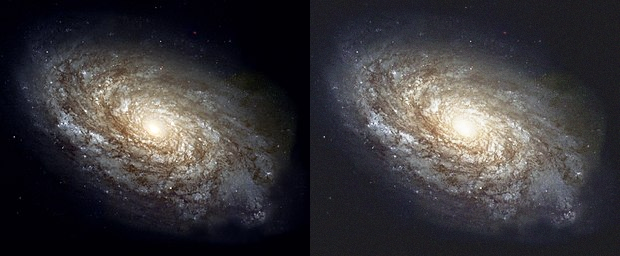

In [45]:
# Inisialisasi noise dengan gambar noise pertama sebagai dasar untuk proses averaging
noise = cv_img[0]

# Menentukan berapa banyak gambar noise yang akan di-average
noise_count = 9

# Mengiterasi gambar noise untuk melakukan penggabungan secara bertahap
for i in range(noise_count):
    if i == 0:
        pass  # Melewati iterasi pertama karena dst sudah diset sebagai gambar pertama
    else:
        alpha = 1.0 / (i + 1)  # Alpha adalah bobot dari gambar yang akan digabung
        beta = 1.0 - alpha     # Beta adalah bobot dari dst (gambar hasil penggabungan sebelumnya)
        # Menggabungkan dua gambar dengan bobot alpha dan beta secara bertahap
        noise = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

# Fungsi untuk menghitung PSNR (Peak Signal-to-Noise Ratio) antara dua gambar
def PSNR(img1, img2):
    # Menghitung Mean Squared Error (MSE) antara dua gambar
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:  # Jika MSE adalah 0, berarti tidak ada perbedaan antara dua gambar
      return 100  # PSNR tidak relevan karena tidak ada noise
    max_pixel = 255.0  # Nilai maksimum intensitas piksel (8-bit)
    psnr = 20 * log10(max_pixel / sqrt(mse))  # Rumus untuk menghitung PSNR
    return psnr

# Menghitung PSNR antara gambar asli (img1) dan gambar hasil denoising (dst)
img2 = noise
psnr = PSNR(img1, img2)

# Menampilkan nilai PSNR dalam desibel (dB)
print(f'Nilai PSNR : {psnr:.8f} dB')

# Menggabungkan gambar asli dan hasil denoising secara horizontal untuk perbandingan
final_frame = cv.hconcat((img1, noise))

# Menampilkan gambar yang digabungkan
cv2_imshow(final_frame)

Nilai PSNR : 27.50980410 dB


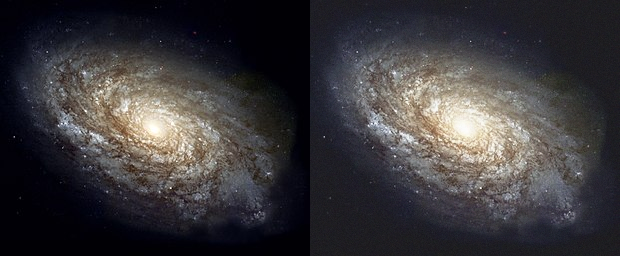

In [46]:
# Inisialisasi noise dengan gambar noise pertama sebagai dasar untuk proses averaging
noise = cv_img[0]

# Menentukan berapa banyak gambar noise yang akan di-average
noise_count = 19

# Mengiterasi gambar noise untuk melakukan penggabungan secara bertahap
for i in range(noise_count):
    if i == 0:
        pass  # Melewati iterasi pertama karena dst sudah diset sebagai gambar pertama
    else:
        alpha = 1.0 / (i + 1)  # Alpha adalah bobot dari gambar yang akan digabung
        beta = 1.0 - alpha     # Beta adalah bobot dari dst (gambar hasil penggabungan sebelumnya)
        # Menggabungkan dua gambar dengan bobot alpha dan beta secara bertahap
        noise = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

# Fungsi untuk menghitung PSNR (Peak Signal-to-Noise Ratio) antara dua gambar
def PSNR(img1, img2):
    # Menghitung Mean Squared Error (MSE) antara dua gambar
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:  # Jika MSE adalah 0, berarti tidak ada perbedaan antara dua gambar
      return 100  # PSNR tidak relevan karena tidak ada noise
    max_pixel = 255.0  # Nilai maksimum intensitas piksel (8-bit)
    psnr = 20 * log10(max_pixel / sqrt(mse))  # Rumus untuk menghitung PSNR
    return psnr

# Menghitung PSNR antara gambar asli (img1) dan gambar hasil denoising (dst)
img2 = noise
psnr = PSNR(img1, img2)

# Menampilkan nilai PSNR dalam desibel (dB)
print(f'Nilai PSNR : {psnr:.8f} dB')

# Menggabungkan gambar asli dan hasil denoising secara horizontal untuk perbandingan
final_frame = cv.hconcat((img1, noise))

# Menampilkan gambar yang digabungkan
cv2_imshow(final_frame)

Nilai PSNR : 27.51014516 dB


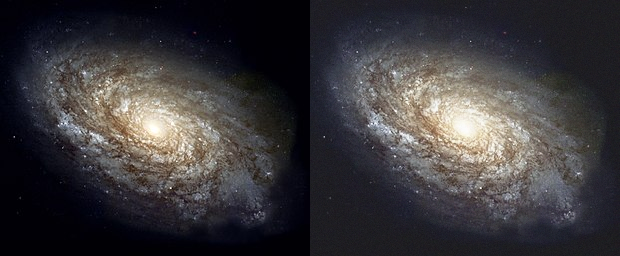

In [47]:
# Inisialisasi noise dengan gambar noise pertama sebagai dasar untuk proses averaging
noise = cv_img[0]

# Menentukan berapa banyak gambar noise yang akan di-average
noise_count = 39

# Mengiterasi gambar noise untuk melakukan penggabungan secara bertahap
for i in range(noise_count):
    if i == 0:
        pass  # Melewati iterasi pertama karena dst sudah diset sebagai gambar pertama
    else:
        alpha = 1.0 / (i + 1)  # Alpha adalah bobot dari gambar yang akan digabung
        beta = 1.0 - alpha     # Beta adalah bobot dari dst (gambar hasil penggabungan sebelumnya)
        # Menggabungkan dua gambar dengan bobot alpha dan beta secara bertahap
        noise = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

# Fungsi untuk menghitung PSNR (Peak Signal-to-Noise Ratio) antara dua gambar
def PSNR(img1, img2):
    # Menghitung Mean Squared Error (MSE) antara dua gambar
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:  # Jika MSE adalah 0, berarti tidak ada perbedaan antara dua gambar
      return 100  # PSNR tidak relevan karena tidak ada noise
    max_pixel = 255.0  # Nilai maksimum intensitas piksel (8-bit)
    psnr = 20 * log10(max_pixel / sqrt(mse))  # Rumus untuk menghitung PSNR
    return psnr

# Menghitung PSNR antara gambar asli (img1) dan gambar hasil denoising (dst)
img2 = noise
psnr = PSNR(img1, img2)

# Menampilkan nilai PSNR dalam desibel (dB)
print(f'Nilai PSNR : {psnr:.8f} dB')

# Menggabungkan gambar asli dan hasil denoising secara horizontal untuk perbandingan
final_frame = cv.hconcat((img1, noise))

# Menampilkan gambar yang digabungkan
cv2_imshow(final_frame)

Nilai PSNR : 27.51036401 dB


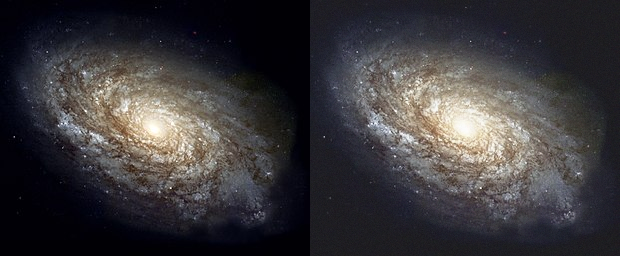

In [48]:
# Inisialisasi noise dengan gambar noise pertama sebagai dasar untuk proses averaging
noise = cv_img[0]

# Menentukan berapa banyak gambar noise yang akan di-average
noise_count = 79

# Mengiterasi gambar noise untuk melakukan penggabungan secara bertahap
for i in range(noise_count):
    if i == 0:
        pass  # Melewati iterasi pertama karena dst sudah diset sebagai gambar pertama
    else:
        alpha = 1.0 / (i + 1)  # Alpha adalah bobot dari gambar yang akan digabung
        beta = 1.0 - alpha     # Beta adalah bobot dari dst (gambar hasil penggabungan sebelumnya)
        # Menggabungkan dua gambar dengan bobot alpha dan beta secara bertahap
        noise = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

# Fungsi untuk menghitung PSNR (Peak Signal-to-Noise Ratio) antara dua gambar
def PSNR(img1, img2):
    # Menghitung Mean Squared Error (MSE) antara dua gambar
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:  # Jika MSE adalah 0, berarti tidak ada perbedaan antara dua gambar
      return 100  # PSNR tidak relevan karena tidak ada noise
    max_pixel = 255.0  # Nilai maksimum intensitas piksel (8-bit)
    psnr = 20 * log10(max_pixel / sqrt(mse))  # Rumus untuk menghitung PSNR
    return psnr

# Menghitung PSNR antara gambar asli (img1) dan gambar hasil denoising (dst)
img2 = noise
psnr = PSNR(img1, img2)

# Menampilkan nilai PSNR dalam desibel (dB)
print(f'Nilai PSNR : {psnr:.8f} dB')

# Menggabungkan gambar asli dan hasil denoising secara horizontal untuk perbandingan
final_frame = cv.hconcat((img1, noise))

# Menampilkan gambar yang digabungkan
cv2_imshow(final_frame)

Nilai PSNR : 27.51001503 dB


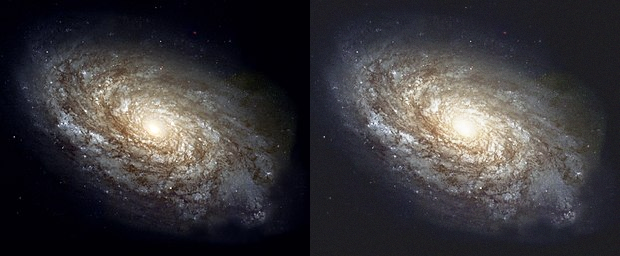

In [54]:
# Inisialisasi noise dengan gambar noise pertama sebagai dasar untuk proses averaging
noise = cv_img[0]

# Menentukan berapa banyak gambar noise yang akan di-average
noise_count = 99

# Mengiterasi gambar noise untuk melakukan penggabungan secara bertahap
for i in range(noise_count):
    if i == 0:
        pass  # Melewati iterasi pertama karena dst sudah diset sebagai gambar pertama
    else:
        alpha = 1.0 / (i + 1)  # Alpha adalah bobot dari gambar yang akan digabung
        beta = 1.0 - alpha     # Beta adalah bobot dari dst (gambar hasil penggabungan sebelumnya)
        # Menggabungkan dua gambar dengan bobot alpha dan beta secara bertahap
        noise = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

# Fungsi untuk menghitung PSNR (Peak Signal-to-Noise Ratio) antara dua gambar
def PSNR(img1, img2):
    # Menghitung Mean Squared Error (MSE) antara dua gambar
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:  # Jika MSE adalah 0, berarti tidak ada perbedaan antara dua gambar
      return 100  # PSNR tidak relevan karena tidak ada noise
    max_pixel = 255.0  # Nilai maksimum intensitas piksel (8-bit)
    psnr = 20 * log10(max_pixel / sqrt(mse))  # Rumus untuk menghitung PSNR
    return psnr

# Menghitung PSNR antara gambar asli (img1) dan gambar hasil denoising (dst)
img2 = noise
psnr = PSNR(img1, img2)

# Menampilkan nilai PSNR dalam desibel (dB)
print(f'Nilai PSNR : {psnr:.8f} dB')

# Menggabungkan gambar asli dan hasil denoising secara horizontal untuk perbandingan
final_frame = cv.hconcat((img1, noise))

# Menampilkan gambar yang digabungkan
cv2_imshow(final_frame)

Kesimpulannya bahwa jumlah gambar yang diambil untuk averaging memiliki dampak signifikan terhadap kualitas gambar akhir. Semakin banyak gambar noise yang digunakan, semakin baik potensi hasil pengurangan noise. Dengan lebih banyak gambar, algoritme averaging dapat menangkap lebih banyak informasi yang relevan dan mengurangi noise secara lebih efektif, sehingga menghasilkan gambar yang lebih jelas dan berkualitas tinggi.

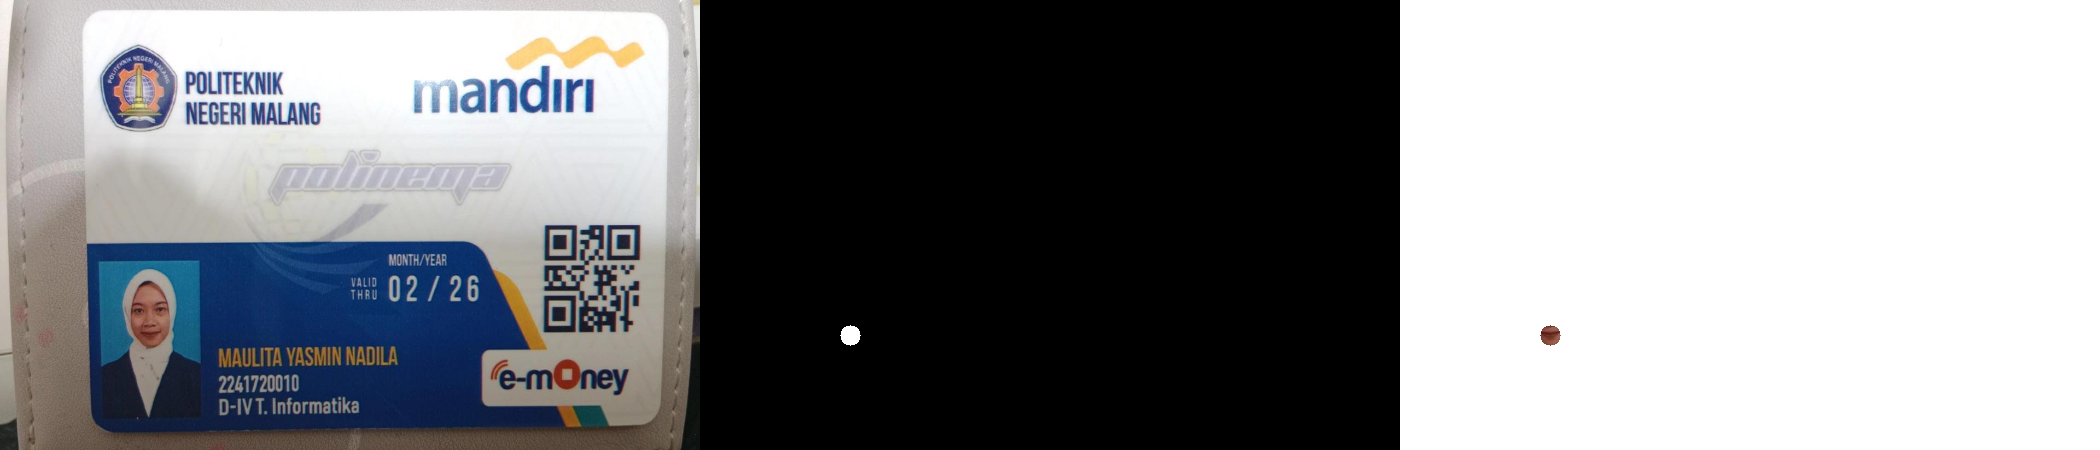

In [66]:
# 4. Kelompok 6 (Mulut)

import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

# Membaca gambar dari file
original = cv.imread('/content/drive/MyDrive/PCVK/Images/Maulita_18.jpg')
# Mengubah ukuran gambar ke resolusi yang lebih kecil (700x450 piksel)
original = cv.resize(original, (700, 450))

# Membuat mask berukuran sama dengan gambar asli, diisi dengan nol (hitam)
mask = np.zeros(original.shape, dtype=np.uint8)
# Menggambar lingkaran putih dengan radius 10 pada mask di posisi (150, 335)
mask = cv.circle(mask, (150, 335), 10, (255, 255, 255), -1)

# Menggunakan operasi AND bitwise antara gambar asli dan mask untuk menghasilkan gambar ter-mask
result = original & mask
# Mengatur area yang tidak ter-mask (mask == 0) menjadi putih (255)
result[mask == 0] = 255

# Menggabungkan gambar asli, mask, dan hasil masking secara horizontal
final_frame = cv.hconcat((original, mask, result))
# Menampilkan gambar gabungan (gambar asli, mask, dan hasil masking)
cv2_imshow(final_frame)

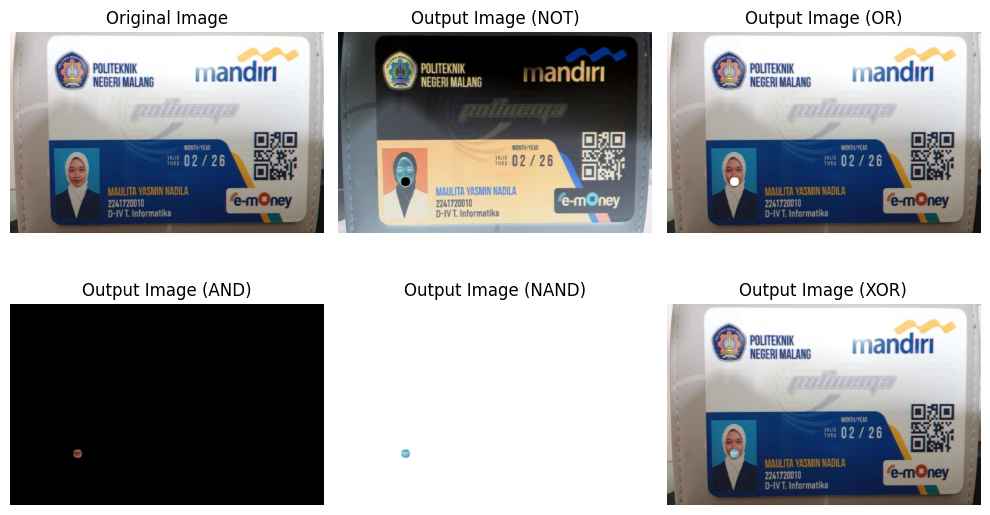

In [76]:
# 5. BUAT MENGGUNAKAN OPERATOR LAIN

# Membaca gambar asli
original_image = cv.imread('/content/drive/MyDrive/PCVK/Images/Maulita_18.jpg')

if original_image is None:
    print("Citra asli tidak ditemukan.")
else:
    # Mengonversi BGR ke RGB
    original_image = cv.cvtColor(original_image, cv.COLOR_BGR2RGB)
    # Resize gambar jika perlu
    original_image = cv.resize(original_image, (700, 450))

    # Membuat lingkaran putih pada gambar hitam dengan ukuran dan warna yang sama
    circle_image = np.zeros_like(original_image)

    # Koordinat untuk posisi mulut
    pcc = (150, 335)  # Koordinat untuk wajah pertama
    radius = 10  # Radius untuk wajah pertama
    cv.circle(circle_image, pcc, radius, (255, 255, 255), thickness=-1)

    # Operator NOT untuk setiap channel (BGR)
    not_img = cv.bitwise_not(original_image)

    # Menambahkan lingkaran ke gambar NOT
    cv.circle(not_img, pcc, radius, (0, 0, 0), thickness=-1)

    # Operator OR
    or_img = cv.bitwise_or(original_image, circle_image)

    # Operator AND
    and_img = cv.bitwise_and(original_image, circle_image)

    # Operator NAND
    nand_img = cv.bitwise_not(cv.bitwise_and(original_image, circle_image))

    # Operator XOR
    xor_img = cv.bitwise_xor(original_image, circle_image)

    # Menampilkan hasil
    plt.figure(figsize=(10, 6))

    plt.subplot(2, 3, 1)
    plt.title('Original Image')
    plt.imshow(original_image)  # Mengonversi BGR ke RGB
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.title('Output Image (NOT)')
    plt.imshow(not_img)
    plt.axis('off')

    plt.subplot(2, 3, 3)
    plt.title('Output Image (OR)')
    plt.imshow(or_img)
    plt.axis('off')

    plt.subplot(2, 3, 4)
    plt.title('Output Image (AND)')
    plt.imshow(and_img)
    plt.axis('off')

    plt.subplot(2, 3, 5)
    plt.title('Output Image (NAND)')
    plt.imshow(nand_img)
    plt.axis('off')

    plt.subplot(2, 3, 6)
    plt.title('Output Image (XOR)')
    plt.imshow(xor_img)
    plt.axis('off')

    plt.tight_layout()
    plt.show()

Hasil analisis :
1. NOT: Menggunakan cv.bitwise_not(), citra asli dibalik warnanya. Lingkaran putih kemudian ditambahkan ke citra NOT dengan warna hitam, yang akan menghapus area lingkaran dari citra NOT.
2. OR: Menggunakan cv.bitwise_or(), citra asli dan lingkaran putih digabungkan. Hasilnya adalah citra yang menunjukkan area di mana salah satu dari kedua citra memiliki nilai piksel yang tidak nol.
3. AND: Menggunakan cv.bitwise_and(), hanya area di mana citra asli dan lingkaran putih tumpang tindih yang akan terlihat.
4. NAND: Menggunakan cv.bitwise_not() pada hasil AND, menghasilkan citra yang menunjukkan semua area kecuali yang tumpang tindih.
5. XOR: Menggunakan cv.bitwise_xor(), hasilnya adalah citra yang menunjukkan area di mana hanya salah satu dari citra asli atau lingkaran putih yang memiliki nilai piksel yang tidak nol.